# 导入工具包

In [1]:
# opencv-python
import cv2

import numpy as np

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [2]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入模型、输入图像、获取预测结果、可视化

In [3]:
mp_face_mesh = mp.solutions.face_mesh
model = mp_face_mesh.FaceMesh(   
        static_image_mode=True,      # 是静态图片还是连续视频帧
        refine_landmarks=True,       # 使用Attention Mesh Model，对嘴唇、眼睛、瞳孔周围的关键点精细定位
        max_num_faces=5,              # 最多检测几张脸
        min_detection_confidence=0.5, # 置信度阈值，越接近1越准
        min_tracking_confidence=0.5,  # 追踪阈值
)
# 导入可视化函数和可视化样式
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=3, circle_radius=5, color=[223,155,6])

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


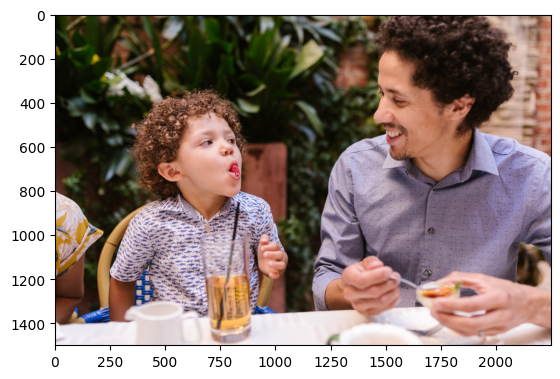

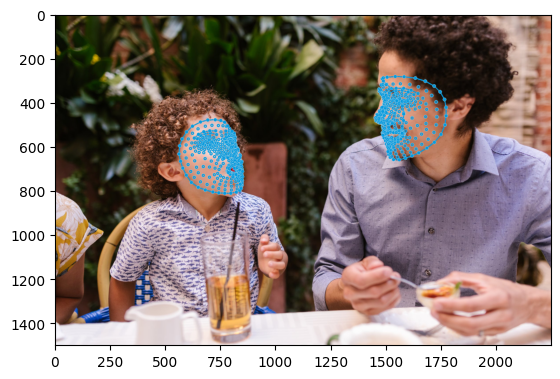

In [4]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('two-person.jpeg')

look_img(img)

# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = model.process(img_RGB)

if results.multi_face_landmarks: # 如果检测出人脸
    for face_landmarks in results.multi_face_landmarks: # 遍历每一张脸
        mp_drawing.draw_landmarks(
              image=img,
              landmark_list=face_landmarks,
              connections=mp_face_mesh.FACEMESH_CONTOURS,
              landmark_drawing_spec=drawing_spec,
              connection_drawing_spec=drawing_spec)    
else:
    print('未检测出人脸')

look_img(img)

# 脸轮廓关键点之间的连接关系

In [5]:
mp_face_mesh.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

# 从results中解析每张脸的每个关键点的信息

In [6]:
results

mediapipe.python.solution_base.SolutionOutputs

In [7]:
# 预测出脸的个数
len(results.multi_face_landmarks)

2

In [8]:
# 所有脸的所有关键点坐标
results.multi_face_landmarks

[landmark {
   x: 0.6813027858734131
   y: 0.35201579332351685
   z: -0.0035735827405005693
 }
 landmark {
   x: 0.6479436159133911
   y: 0.3234814703464508
   z: -0.017395908012986183
 }
 landmark {
   x: 0.6628078818321228
   y: 0.33264628052711487
   z: -0.006923659238964319
 }
 landmark {
   x: 0.6528573632240295
   y: 0.29313206672668457
   z: -0.01241338811814785
 }
 landmark {
   x: 0.6464020013809204
   y: 0.3146304488182068
   z: -0.019572561606764793
 }
 landmark {
   x: 0.64983731508255
   y: 0.30315035581588745
   z: -0.019898127764463425
 }
 landmark {
   x: 0.6633473634719849
   y: 0.2701565623283386
   z: -0.01656295917928219
 }
 landmark {
   x: 0.6621986031532288
   y: 0.25543132424354553
   z: 0.031503695994615555
 }
 landmark {
   x: 0.6659539341926575
   y: 0.24888771772384644
   z: -0.018298424780368805
 }
 landmark {
   x: 0.6645376682281494
   y: 0.23772312700748444
   z: -0.021016722545027733
 }
 landmark {
   x: 0.6683052778244019
   y: 0.19119182229042053
   z

In [9]:
# 索引为0的脸的关键点坐标
results.multi_face_landmarks[0]

landmark {
  x: 0.6813027858734131
  y: 0.35201579332351685
  z: -0.0035735827405005693
}
landmark {
  x: 0.6479436159133911
  y: 0.3234814703464508
  z: -0.017395908012986183
}
landmark {
  x: 0.6628078818321228
  y: 0.33264628052711487
  z: -0.006923659238964319
}
landmark {
  x: 0.6528573632240295
  y: 0.29313206672668457
  z: -0.01241338811814785
}
landmark {
  x: 0.6464020013809204
  y: 0.3146304488182068
  z: -0.019572561606764793
}
landmark {
  x: 0.64983731508255
  y: 0.30315035581588745
  z: -0.019898127764463425
}
landmark {
  x: 0.6633473634719849
  y: 0.2701565623283386
  z: -0.01656295917928219
}
landmark {
  x: 0.6621986031532288
  y: 0.25543132424354553
  z: 0.031503695994615555
}
landmark {
  x: 0.6659539341926575
  y: 0.24888771772384644
  z: -0.018298424780368805
}
landmark {
  x: 0.6645376682281494
  y: 0.23772312700748444
  z: -0.021016722545027733
}
landmark {
  x: 0.6683052778244019
  y: 0.19119182229042053
  z: -0.02471053972840309
}
landmark {
  x: 0.68104612827

In [10]:
# 索引为1的脸的关键点坐标
results.multi_face_landmarks[1]

landmark {
  x: 0.36764177680015564
  y: 0.4368532598018646
  z: -0.021065644919872284
}
landmark {
  x: 0.35981979966163635
  y: 0.4171600639820099
  z: -0.02332262508571148
}
landmark {
  x: 0.3549693822860718
  y: 0.4337060749530792
  z: -0.01611432433128357
}
landmark {
  x: 0.3457377254962921
  y: 0.3983660936355591
  z: -0.01489721704274416
}
landmark {
  x: 0.3585036098957062
  y: 0.40886756777763367
  z: -0.023005176335573196
}
landmark {
  x: 0.35413509607315063
  y: 0.40154072642326355
  z: -0.018913449719548225
}
landmark {
  x: 0.3413880169391632
  y: 0.38511139154434204
  z: -0.0005917513626627624
}
landmark {
  x: 0.29838263988494873
  y: 0.3956318497657776
  z: -0.008659834042191505
}
landmark {
  x: 0.33556631207466125
  y: 0.3678452968597412
  z: 0.0073701487854123116
}
landmark {
  x: 0.33389219641685486
  y: 0.3566477596759796
  z: 0.009797823615372181
}
landmark {
  x: 0.3225414454936981
  y: 0.3193734586238861
  z: 0.025513123720884323
}
landmark {
  x: 0.368317514

# 获取索引为0的脸的454号关键点坐标

In [11]:
results.multi_face_landmarks[0].landmark[454]

x: 0.7869538068771362
y: 0.2824653685092926
z: -0.032655488699674606

In [12]:
results.multi_face_landmarks[0].landmark[454].x

0.7869538068771362

# 将相对坐标转为绝对像素坐标，可视化

In [13]:
# 获取图像宽高
h, w = img.shape[0], img.shape[1]
print(h,w)

1500 2250


In [14]:
cx = results.multi_face_landmarks[0].landmark[454].x * w
cx = int(cx)
cx

1770

In [15]:
cy = results.multi_face_landmarks[0].landmark[454].y * h
cy = int(cy)
cy

423

In [16]:
img = cv2.circle(img,(cx,cy), 25, (0,0,255), -1)

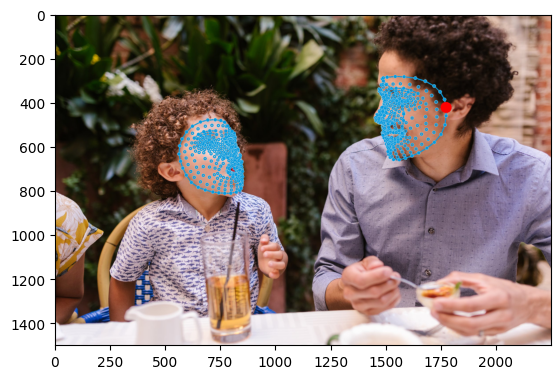

In [17]:
look_img(img)

# 索引为1的脸的苹果肌

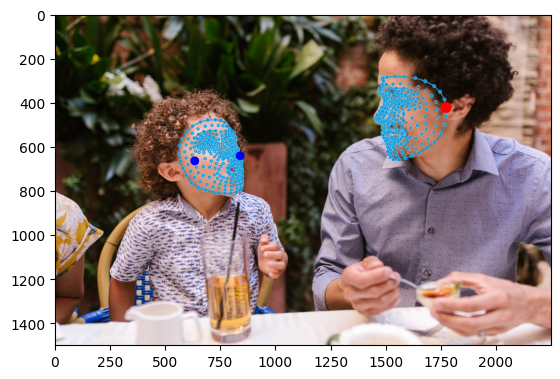

In [18]:
cx = int(results.multi_face_landmarks[1].landmark[123].x * w)
cy = int(results.multi_face_landmarks[1].landmark[123].y * h)
img = cv2.circle(img,(cx,cy), 20, (255,0,0), -1)

cx = int(results.multi_face_landmarks[1].landmark[352].x * w)
cy = int(results.multi_face_landmarks[1].landmark[352].y * h)
img = cv2.circle(img,(cx,cy), 20, (255,0,0), -1)
look_img(img)

# 三维可视化

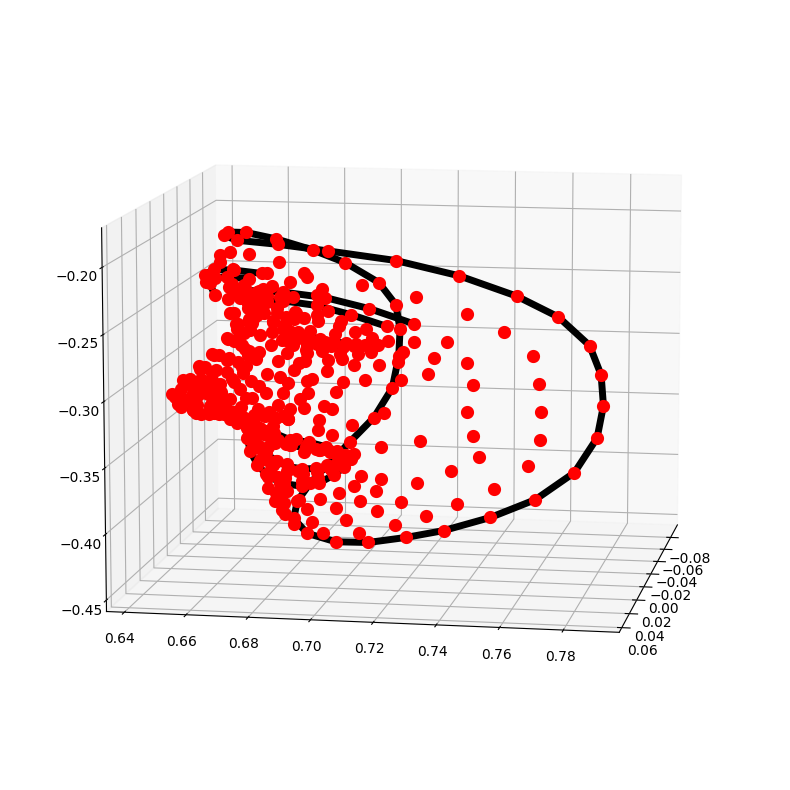

In [19]:
# 在三维坐标系中可视化索引为0的脸
mp_drawing.plot_landmarks(results.multi_face_landmarks[0], mp_face_mesh.FACEMESH_CONTOURS)

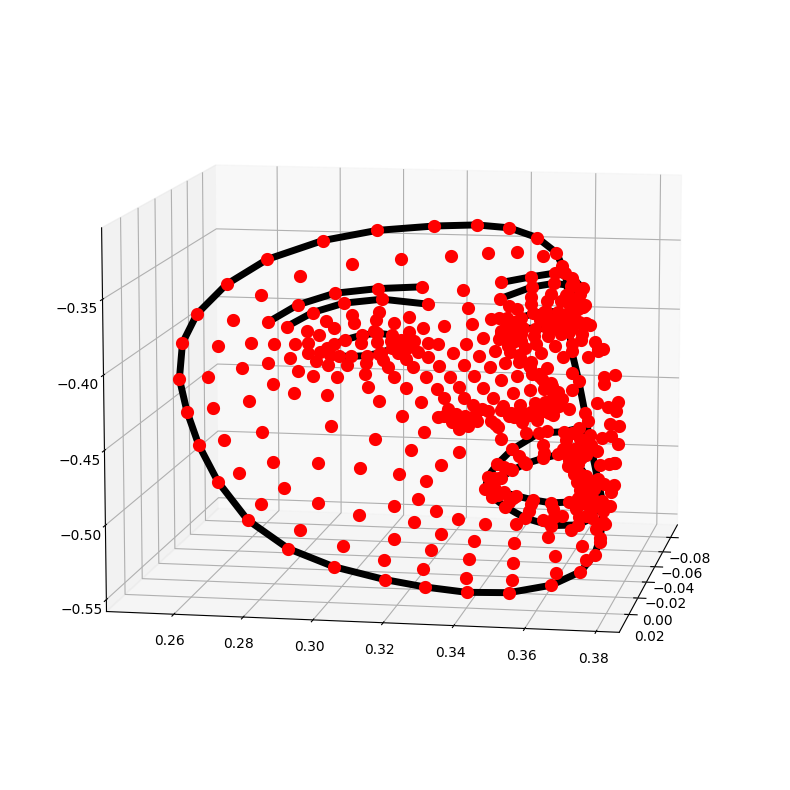

In [20]:
# 在三维坐标系中可视化索引为1的脸
mp_drawing.plot_landmarks(results.multi_face_landmarks[1], mp_face_mesh.FACEMESH_CONTOURS)

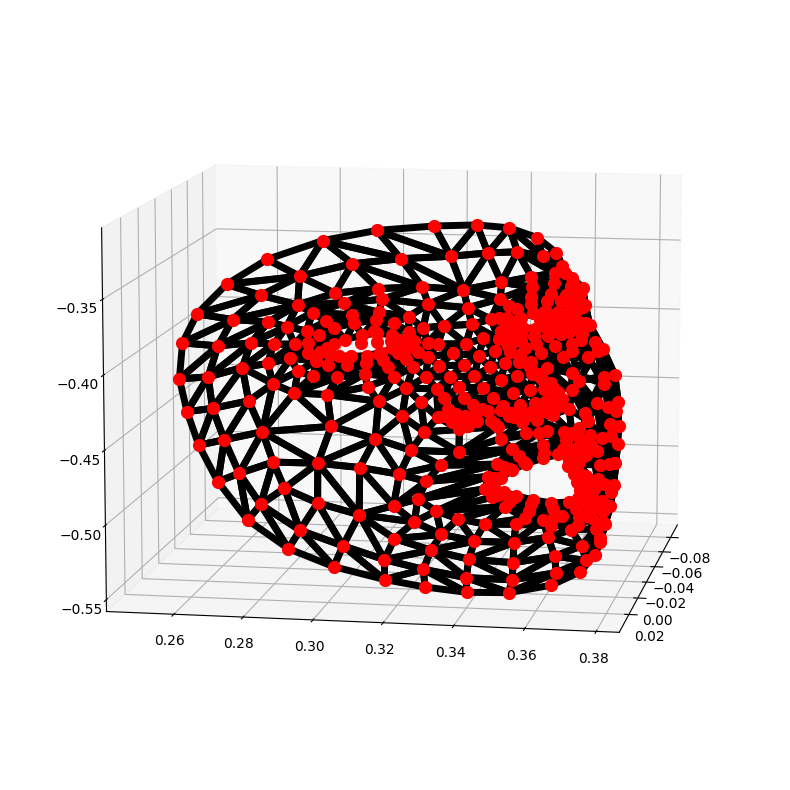

In [21]:
# 在三维坐标系中可视化索引为1的脸
mp_drawing.plot_landmarks(results.multi_face_landmarks[1], mp_face_mesh.FACEMESH_TESSELATION)

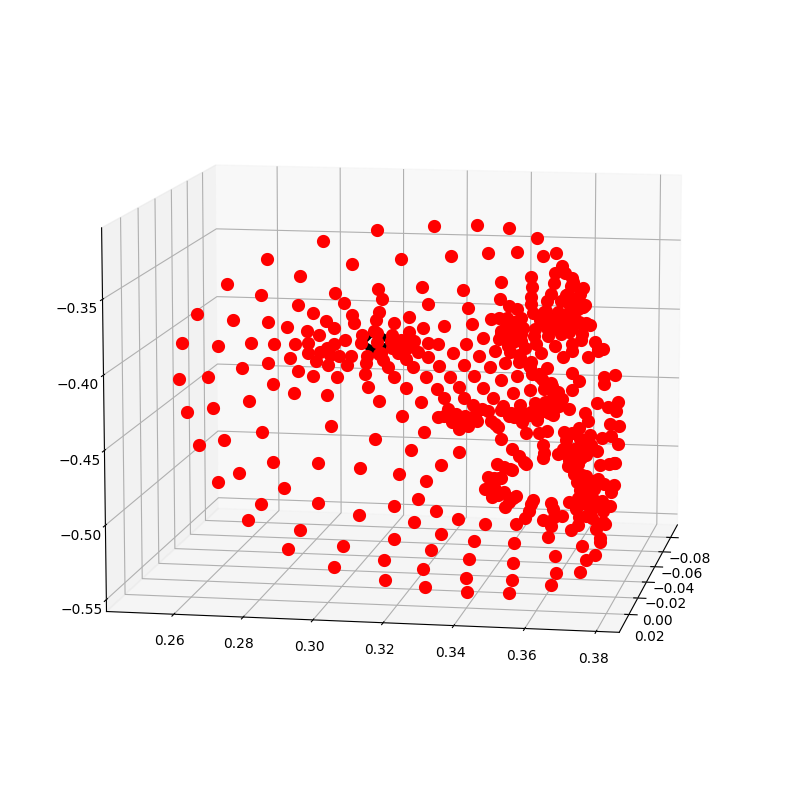

In [22]:
# 在三维坐标系中可视化索引为1的脸
mp_drawing.plot_landmarks(results.multi_face_landmarks[1], mp_face_mesh.FACEMESH_IRISES)

# 交互式三维可视化

In [23]:
# 以索引为0的人脸为例
coords = np.array(results.multi_face_landmarks[0].landmark)

In [24]:
len(coords)

478

In [25]:
coords

array([x: 0.6813027858734131
       y: 0.35201579332351685
       z: -0.0035735827405005693, x: 0.6479436159133911
                                  y: 0.3234814703464508
                                  z: -0.017395908012986183,
       x: 0.6628078818321228
       y: 0.33264628052711487
       z: -0.006923659238964319, x: 0.6528573632240295
                                 y: 0.29313206672668457
                                 z: -0.01241338811814785,
       x: 0.6464020013809204
       y: 0.3146304488182068
       z: -0.019572561606764793, x: 0.64983731508255
                                 y: 0.30315035581588745
                                 z: -0.019898127764463425,
       x: 0.6633473634719849
       y: 0.2701565623283386
       z: -0.01656295917928219, x: 0.6621986031532288
                                y: 0.25543132424354553
                                z: 0.031503695994615555,
       x: 0.6659539341926575
       y: 0.24888771772384644
       z: -0.018298424780368805,

In [26]:
coords[1].x

0.6479436159133911

在不用耗时循环的条件下，如何汇总所有点的XYZ坐标？

In [27]:
def get_x(each):
    return each.x
def get_y(each):
    return each.y
def get_z(each):
    return each.z

# 分别获取所有关键点的XYZ坐标
points_x = np.array(list(map(get_x, coords)))
points_y = np.array(list(map(get_y, coords)))
points_z = np.array(list(map(get_z, coords)))

# 将三个方向的坐标合并
points = np.vstack((points_x, points_y, points_z)).T

In [28]:
points.shape

(478, 3)

In [29]:
points

array([[ 0.68130279,  0.35201579, -0.00357358],
       [ 0.64794362,  0.32348147, -0.01739591],
       [ 0.66280788,  0.33264628, -0.00692366],
       ...,
       [ 0.69353521,  0.2557556 , -0.03293526],
       [ 0.68779558,  0.26246169, -0.03293526],
       [ 0.69231039,  0.27049562, -0.03293526]])

In [30]:
import open3d
point_cloud = open3d.geometry.PointCloud()
point_cloud.points = open3d.utility.Vector3dVector(points)
open3d.visualization.draw_geometries([point_cloud])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [31]:
# 参考代码 老版本open3d
# import open3d
# point_cloud = open3d.PointCloud()
# point_cloud.points = open3d.Vector3dVector(points)
# open3d.draw_geometries([point_cloud])

open3D官网：http://www.open3d.org/

更好的可视化方案是使用WebGL。